In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#######################################

# Sección de parámetros de entrada
B0 = 10.0
Bn = 10.0
L = 10.0
l = 0.5
b = 0.5
hk = 0.5  # Parámetro h/k
theta0 = 10.0
thetan = 10.0

########################################
N = 200   # Número de nodos


def B(B0,Bn,b,L,N):
    x = np.linspace(0,L,N)
    funcion = np.zeros(len(x))
    funcion[np.where(x<=L/3)]=1
    
   # funcion = 2*x**2 +2  
    if (min(funcion) != b/2) or funcion[0] != B0 or funcion[N-1] != Bn:
        print('Función No valida')
        return 0
    return x,funcion
########################################




    


# Ejemplo a resover

In [1]:
import numpy as np
import matplotlib.pyplot as plt
#import warnings
#warnings.filterwarnings("ignore")


# Sección de parámetros de entrada
B0 = 0.3
Bn = 0.3
L = 0.5
l = 0.2
b = 0.1
hk = 0.5  # Parámetro h/k
theta0 = 10.0
thetan = 10.0

# parámetros adicionales
x0 = L/3;
N = 200   # Número de nodos

x = np.linspace(0,L,N)
delta = x[1]-x[0]


# Función de la aleta a la izquierda de x0

# Rango de los puntos que forzan a crear una funcion cancava positiva 
rangoxi = np.linspace(0,x0,10)
rangoyi = np.linspace(b/2,B0/2,10)

rangoxd = np.linspace(x0,L,10)
rangoyd = np.linspace(b/2,Bn/2,10)



coef_polinomios_izquierda = []
coef_polinomios_derecha = []

for i in rangoxi:
    i0 = np.array([0.0, i, x0])
    for j in rangoyi: 
        yi0 = np.array([B0/2, j , b/2])
        zi0 = np.polyfit(i0, yi0, 3, full=False)
        p0 = np.poly1d(zi0)
        if abs((p0(x0+delta)-p0(x0-delta))/(2*delta)) <= 0.1:
            #coef_polinomios.append([p0[3],p0[2],p0[1],p0[0]])
            coef_polinomios_izquierda.append(p0)
            
for i in rangoxd:
    i0 = np.array([x0, i, L])
    for j in rangoyd: 
        yi0 = np.array([b/2, j , Bn/2])
        zi0 = np.polyfit(i0, yi0, 3, full=False)
        p0 = np.poly1d(zi0)
        if abs((p0(x0+delta)-p0(x0-delta))/(2*delta)) <= 0.1:
            #coef_polinomios.append([p0[3],p0[2],p0[1],p0[0]])
            coef_polinomios_derecha.append(p0)

            
            



/srv/conda/envs/notebook/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3326: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/srv/conda/envs/notebook/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3326: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/srv/conda/envs/notebook/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3326: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/srv/conda/envs/notebook/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3326: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/srv/conda/envs/notebook/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3326: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/srv/conda/envs/notebook/lib/python3.7/site-p

Los polinomios para x < x0 :
       3          2
9.919 x + 0.2937 x - 0.9245 x + 0.15
-----------------------------------------
Los polinomios para x > x0 :
       3          2
1.082 x + 0.0707 x - 0.1379 x + 0.06601
       3           2
1.245 x + 0.02764 x - 0.1679 x + 0.07146
       3           2
1.459 x - 0.02783 x - 0.2083 x + 0.07873
        3           2
0.8819 x + 0.06713 x - 0.0632 x + 0.05459
       3            2
1.247 x - 0.008774 x - 0.1444 x + 0.06854
        3           2
0.7403 x + 0.08342 x - 0.02294 x + 0.04808
       3           2
1.204 x - 0.01143 x - 0.1272 x + 0.06594
       3           2
0.713 x + 0.08379 x - 0.01334 x + 0.04659
       3           2
1.316 x - 0.03919 x - 0.1491 x + 0.06985
        3           2
0.7902 x + 0.06589 x - 0.02928 x + 0.04939
       3           2
1.046 x + 0.01472 x - 0.08739 x + 0.05932
        3           2
0.8452 x + 0.05775 x - 0.04371 x + 0.05177
        3           2
0.1261 x + 0.07544 x + 0.05417 x + 0.03829
        3          2


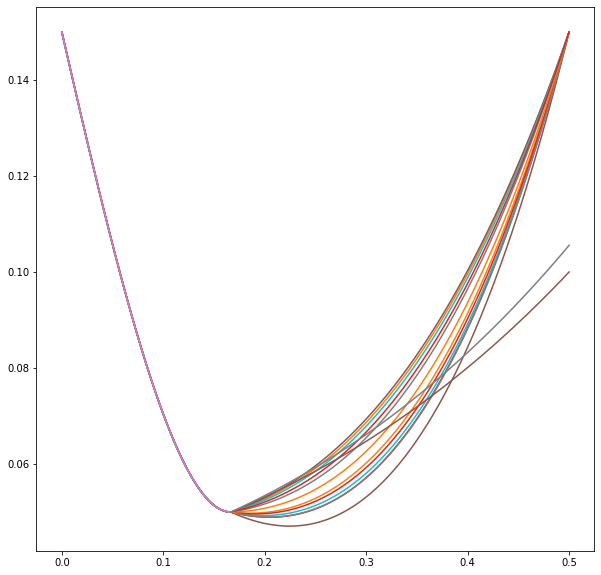

In [16]:
print('Los polinomios para x < x0 :')
for i in range(0,len(coef_polinomios_izquierda)):
    print(coef_polinomios_izquierda[i])
print('-----------------------------------------')
print('Los polinomios para x > x0 :')
for i in range(0,len(coef_polinomios_derecha)):
    print(coef_polinomios_derecha[i])


xi = np.linspace(0,x0,100)
xd = np.linspace(x0,L,100)



for i in range(0,len(coef_polinomios_derecha)):
    plt.figure(1,figsize=(10,10))
    plt.plot(xi,coef_polinomios_izquierda[0](xi))
    plt.plot(xd,coef_polinomios_derecha[i](xd))
    
        
        
#  zi0 = np.polyfit(i0, yi0, 3, full=False)

#i1 = np.array([0.0, 3.1*x0/10, x0])
#i2 = np.array([0.0, 3*x0/10, x0])

#yi1 = np.array([b0/2, (3*(b0/2-b/2)/5+b/2), (b+2)/2])
#yi2 = np.array([b0/2, (4*(b0/2-b/2)/6+b/2), (b+2)/2])